In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("placement (3).csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

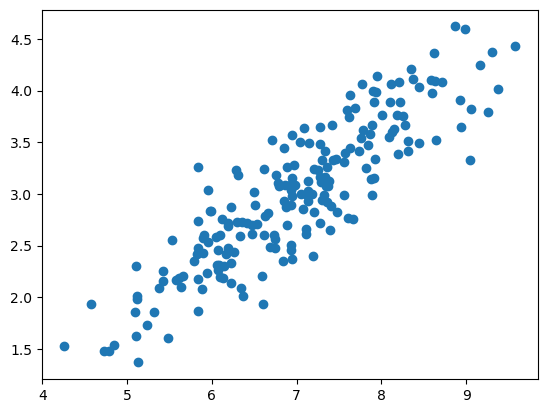

In [6]:
plt.scatter(df['cgpa'],df['package']);

In [7]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


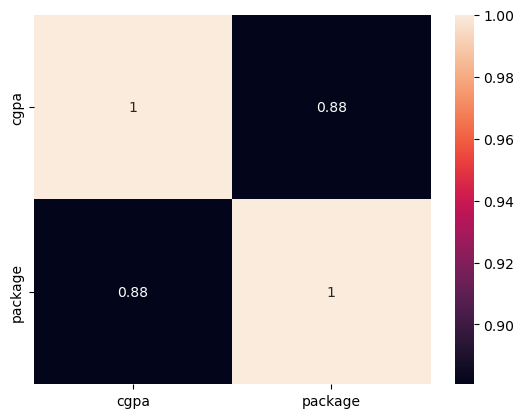

In [9]:
sns.heatmap(df.corr(),annot=True);

In [41]:
x = df[['cgpa']]
y = df['package']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train ,x_test , y_train, y_test = train_test_split(x,y,test_size=0.20,random_state = 2)
x_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
m = lr.coef_
m

array([0.55795197])

In [49]:
b = lr.intercept_
b

-0.8961119222429166

In [54]:
x_train.iloc[0]

cgpa    7.14
Name: 137, dtype: float64

In [59]:
# Y = m*eval(input('enter cgpa '))+b
# Y

In [60]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([3.08766517, 4.0863992 , 2.12798777, 1.94944314, 3.43917491,
       2.87564342, 2.94817717, 2.83100726, 3.51728819, 3.50612915,
       3.96364977, 3.53960627, 2.79195062, 2.59666743, 2.74731446,
       2.68593975, 1.95502266, 2.5018156 , 2.97049525, 3.03186997,
       2.4181228 , 2.47949752, 2.35674808, 2.42370232, 4.29842095,
       2.21726009, 3.50054963, 2.52413367, 3.43359539, 1.80995515,
       2.55761079, 3.90227505, 2.49065656, 3.10998325, 1.96060218,
       3.22715316, 3.70699186, 3.72373042, 3.08208565, 3.20483508,
       2.26189625, 2.4460204 , 3.57308338, 3.08766517, 2.64130359,
       2.94817717, 2.12798777, 2.71383735, 3.39453875, 3.23273268,
       3.16577844, 2.42370232, 3.22157364, 2.97049525, 4.11987632,
       3.2104146 , 3.05418805, 2.10566969, 3.322005  , 3.6902533 ,
       2.3623276 , 2.88680246, 3.11556277, 3.16577844, 2.89238198,
       2.51855416, 2.9258591 , 3.67909426, 2.92027958, 3.21599412,
       2.57434935, 2.79195062, 2.0219769 , 3.12672181, 2.92585

In [61]:
y_train

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64

In [62]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [63]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [66]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae, r2_score

In [69]:
print('Trainning Error',mse(y_train,y_pred_train))
print('Testing Error',mse(y_test,y_pred_test))

Trainning Error 0.10345460923452961
Testing Error 0.12129235313495523


In [73]:
rmse_train = np.sqrt(mse(y_train,y_pred_train))
rmse_test = mse(y_test,y_pred_test)**0.5

print('Trainning Error',rmse_train)
print('Testing Error',rmse_test)

Trainning Error 0.3216436059282535
Testing Error 0.3482705171773161


In [74]:
print('Trainning Error',mae(y_train,y_pred_train))
print('Testing Error',mae(y_test,y_pred_test))

Trainning Error 0.2529676082975413
Testing Error 0.2884710931878174


In [77]:
accu_train = r2_score(y_train,y_pred_train)
accu_test = r2_score(y_test,y_pred_test)
print('Trainning Accuracy',accu_train)
print('Testing Accuracy',accu_test)

Trainning Accuracy 0.7733110961245032
Testing Accuracy 0.7807301475103842


In [79]:
np.mean((y_train-y_pred_train)**2)

0.10345460923452961

In [81]:
d = pd.DataFrame()
d

""


In [83]:
d['y_actual']=y_train
d['y_pred']=y_pred_train

In [89]:
rss = sum((d['y_actual']-d['y_pred'])**2)
rss

16.552737477524737

In [91]:
d['y_actual'].mean()

3.0039375

In [94]:
tss = sum((d['y_actual']-3.0039375)**2)
tss

73.01961937499999

In [95]:
1-(rss/tss)

0.7733110961245032

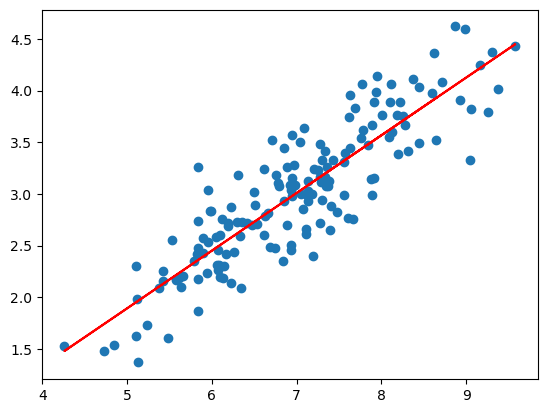

In [98]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),'r')

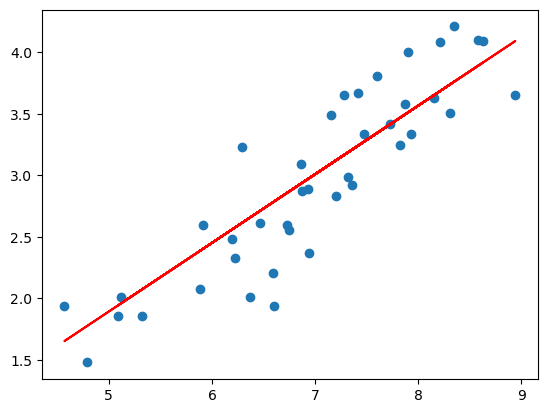

In [99]:
plt.scatter(x_test,y_test)
plt.plot(x_test,lr.predict(x_test),'r')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('placement (3).csv')

In [3]:
# df

In [4]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


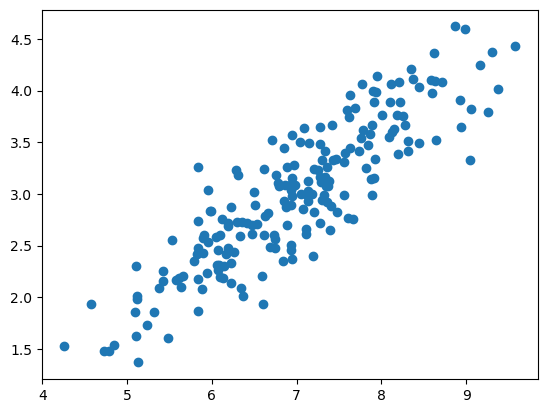

In [6]:
plt.scatter(df['cgpa'],df['package']);

In [7]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


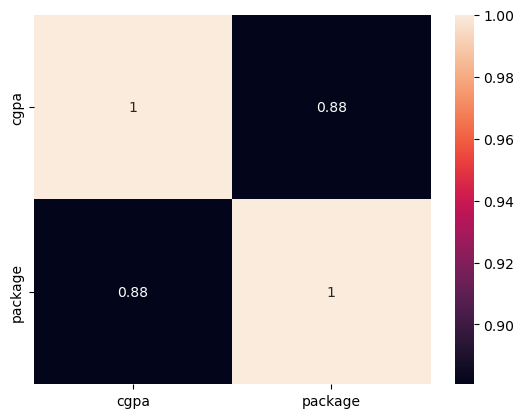

In [8]:
sns.heatmap(df.corr(),annot=True);

In [9]:
x=df[['cgpa']]
y=df['package']

In [10]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [11]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [14]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(160, 1) (160,)
(40, 1) (40,)


In [15]:
x_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()

In [18]:
lr.fit(x_train,y_train) # training 

LinearRegression()

In [19]:
m=lr.coef_
m

array([0.55795197])

In [20]:
c=lr.intercept_
c

-0.8961119222429166

In [21]:
y_pred_test=lr.predict(x_test)
y_pred_train=lr.predict(x_train)

In [22]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae , r2_score

In [23]:
print('mean squared error on test data',mse(y_test,y_pred_test))
print('mean squared error on train data',mse(y_train,y_pred_train))

mean squared error on test data 0.12129235313495523
mean squared error on train data 0.10345460923452961


In [24]:
print('root mean squared error on test data',np.sqrt(mse(y_test,y_pred_test)))
print('root mean squared error on train data',(mse(y_train,y_pred_train))**0.5)

root mean squared error on test data 0.3482705171773161
root mean squared error on train data 0.3216436059282535


In [25]:
r2_score(y_train,y_pred_train)

0.7733110961245032

In [26]:
r2_score(y_test,y_pred_test)

0.7807301475103842

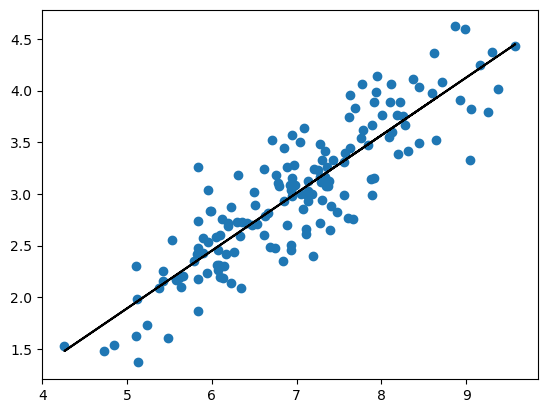

In [27]:
plt.scatter(x_train['cgpa'],y_train)
plt.plot(x_train['cgpa'],lr.predict(x_train),color='k');

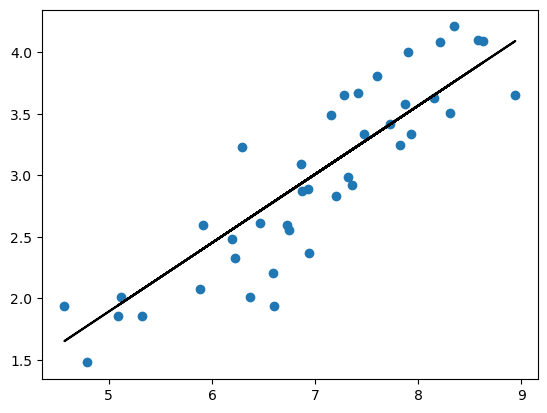

In [28]:
plt.scatter(x_test['cgpa'],y_test)
plt.plot(x_test['cgpa'],lr.predict(x_test),color='k');

In [29]:
D=pd.DataFrame()
D

""


In [30]:
D['y_test']=y_test

In [31]:
D['y_pred']=y_pred_test

In [33]:
RSS=np.sum((D['y_test']-D['y_pred'])**2)
RSS

4.851694125398209

In [39]:
TSS=np.sum((D['y_test']-D['y_test'].mean())**2)
TSS

22.12659

In [40]:
1-(RSS/TSS)

0.7807301475103842

In [157]:
d=pd.DataFrame()
d

""


In [159]:
d['y_test']=y_test
d['y_test_pred']=y_pred_test

In [163]:
d['residual']=d['y_test']-d['y_test_pred']
d['residual_sq']=d['residual']**2

In [166]:
rss=d['residual_sq'].sum()
rss

4.851694125398209

In [167]:
d['y_test'].mean()

2.9645

In [170]:
d['y_mean']=d['y_test']-2.9645
d['y_mean_sq']=d['y_mean']**2

In [173]:
tss=d['y_mean_sq'].sum()

In [176]:
R2_score=1-(rss/tss)
R2_score

0.7807301475103842